## Programming Assignment 3 - Greedy algorithm + Dynamic programming

### 1 & 2) Huffman coding

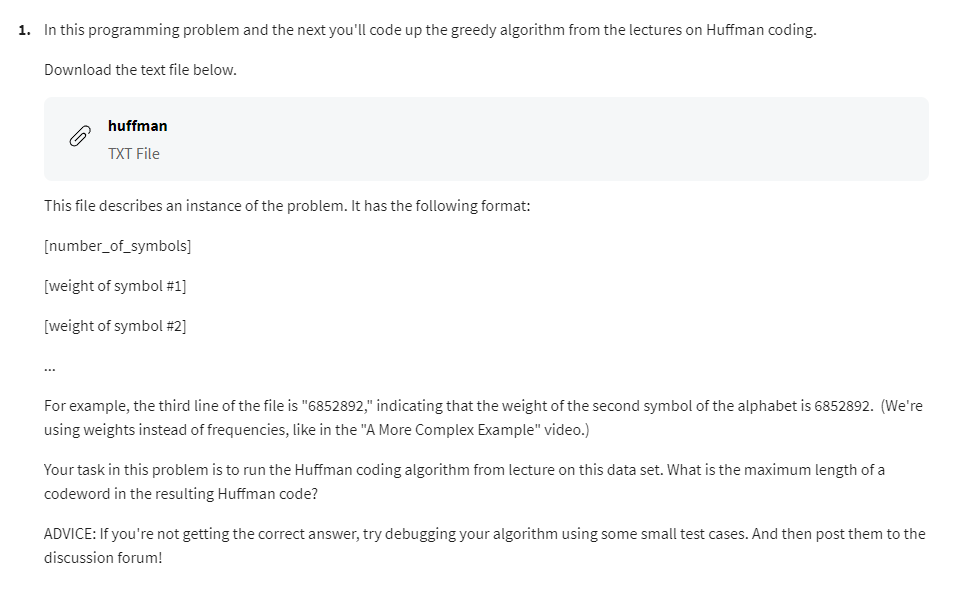

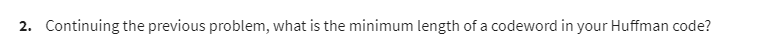

[Huffman coding visualization](https://www.youtube.com/watch?v=dM6us854Jk0&ab_channel=CSBreakdown)<br><br>Since this problem is not asking for decoding bits of each string, we can regard the weights as node values.

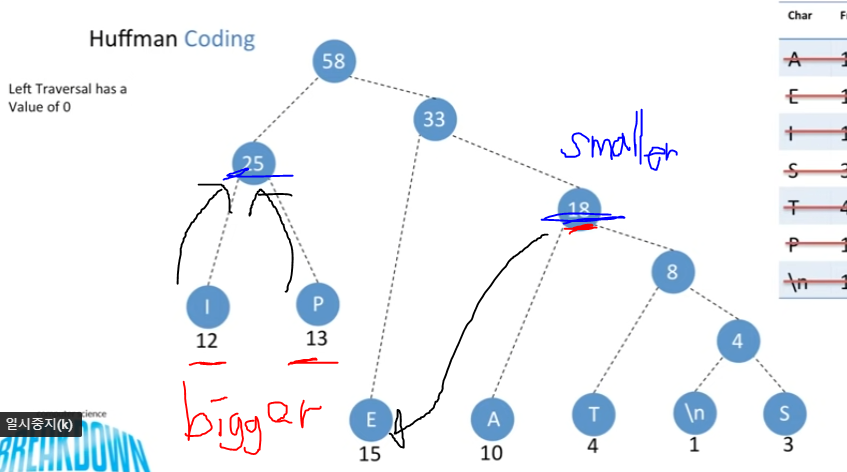

[Code templates from towarddatascience](https://towardsdatascience.com/huffman-encoding-python-implementation-8448c3654328)

In [50]:
from google.colab import drive

drive.mount("/content/gdrive")
with open('/content/gdrive/My Drive/Colab Notebooks/Coursera/Algorithm_Specialization/Chapter3/huffman.txt', 'r') as f:
    numOfNodes = f.readline()

    data = f.readlines()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [53]:
class TreeNode(object):
  def __init__(self, weight, left=None, right=None):
    self.weight = weight # the same role as 'val' in normal trees
    self.left = left
    self.right = right
    #self.code = '' # this line is deleted as what bits each node represents is not important for this problem

weights = list(map(lambda x:int(x[:-1]), data))
nodes = []

for weight in weights:
  nodes.append(TreeNode(weight)) # initialize all the leaf nodes (given strings)

while len(nodes) > 1: # only one element means the final tree is completed (only one parent node left -> it becomes root)
  nodes = sorted(nodes, key = lambda x: x.weight)

  right = nodes[0] # the first element means the node with the minimum weight
  left = nodes[1] # the second element means the node with the second minimum weight

  #left.code = 0 
  #right.code = 1

  newNode = TreeNode(left.weight + right.weight, left, right) # two nodes construct the parent node

  nodes.remove(left) #
  nodes.remove(right) #
  nodes.append(newNode) # acts like a queue 

root = nodes[0]
bits = []

def traverse(CurNode, bitcnt): # min / max depth computation

  if CurNode.left == None == CurNode.right:
    bits.append(bitcnt)
    return

  if CurNode.left != None:
    traverse(CurNode.left, bitcnt + 1)
  if CurNode.right != None:
    traverse(CurNode.right, bitcnt + 1)

traverse(root, 0)
print(f"The maximum length of a codeword : {max(bits)}\nThe minimum length of a codeword : {min(bits)}")

The maximum length of a codeword : 19
The minimum length of a codeword : 9


### 3) MWIS

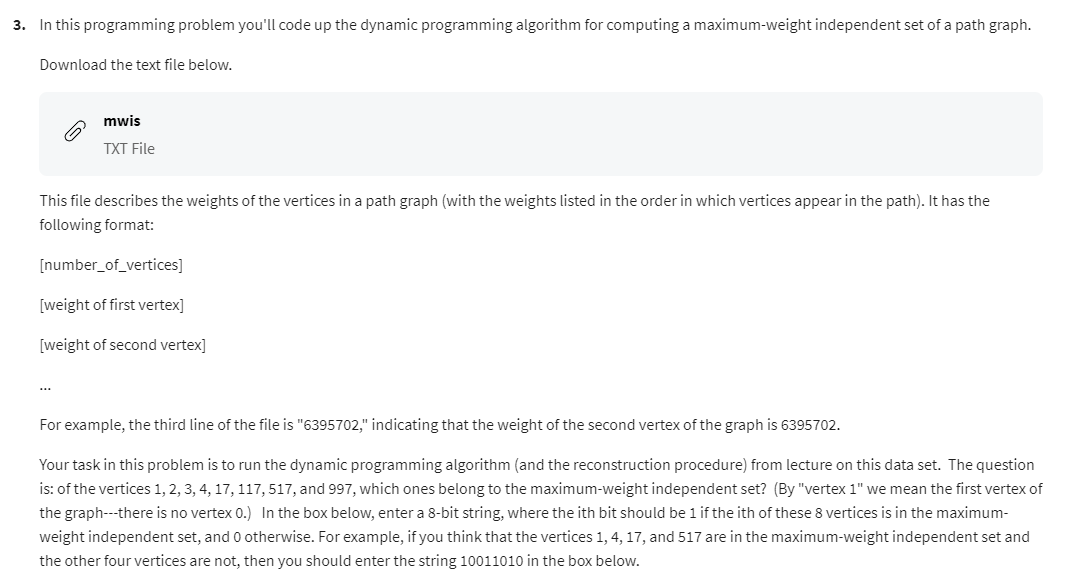

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")
with open('/content/gdrive/My Drive/Colab Notebooks/Coursera/Algorithm_Specialization/Chapter3/mwis.txt', 'r') as f:
    numOfNodes = f.readline()

    data = f.readlines()

arr = list(map(lambda x:int(x[:-1]), data))
# arr = [2,7,9,3,1]


# Independent set problem
dp = [arr[0], max(arr[:2])] + [0] * (len(arr) - 2)
for i in range(2, len(arr)):
  dp[i] = max(dp[i-1], dp[i-2] + arr[i])

dp[:5]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


From one of my Notion memos;<br><br>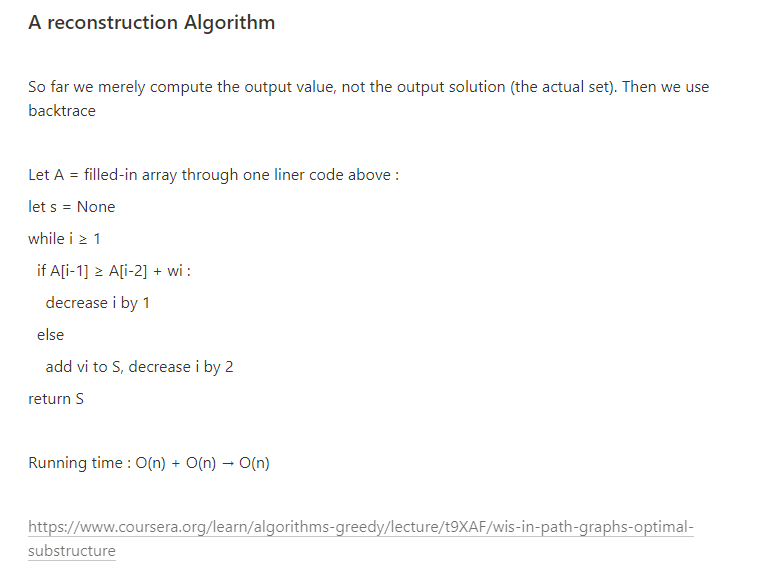

In [ ]:
i, s = len(dp) - 1, []

while i >= 0:
  if dp[i-1] >= dp[i-2] + arr[i]:
    i -= 1
  else:
    s.append(i + 1)
    i -= 2

ans = ""
for vertex in [1,2,3,4,17,117,517,997]:
    ans += '1' if vertex in s else '0'

ans